<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r4_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-normal-n-0-6-9-15-r4.csv?token=AKVFSOCKUQJCNL5TWSIPSX264H7KG')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-malicious-n-0-6-9-15-m-1-11-r4.csv?token=AKVFSODMPTHQ57X2CQJVNRS64H7KK')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,84,1,2,1,1,4,3,9,6,6,24,8,5,3,2,0.666667,12,93,1,93,93,2,20,3,27,1
1,84,1,2,1,1,4,3,9,6,6,24,8,7,3,2,0.666667,12,117,1,117,117,2,28,3,27,0
2,128,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.750000,16,92,2,93,184,6,4,20,340,1
3,129,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.750000,17,91,3,93,273,6,16,20,340,1
4,130,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.750000,18,90,4,93,360,6,24,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312575,3278961,2,0,4,1,1,5,19,20,4,15,15,60216,5,0,0.000000,5,5,20,24,100,0,240864,20,380,0
312576,3278962,2,0,4,2,2,5,19,20,4,15,15,60216,5,0,0.000000,6,4,21,24,84,0,963456,20,380,0
312577,3278963,2,0,4,3,2,5,19,20,4,15,15,60216,5,0,0.000000,7,3,22,24,66,0,1445184,20,380,0
312578,3278964,2,0,4,4,2,5,19,20,4,15,15,60216,5,0,0.000000,8,2,23,24,46,0,1926912,20,380,0


In [6]:
df.shape

(312580, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-malicious-n-0-6-9-15-m-1-12-r4.csv?token=AKVFSOD3IUIJAZD6FXCMFBS64H7KO')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-malicious-n-0-6-9-15-m-1-7-r4.csv?token=AKVFSOCX7XMEK52T3TD3MNK64H7KU')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-malicious-n-0-6-9-15-m-11-12-r4.csv?token=AKVFSOCETXA66KAOE7H5BI264H7K2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-malicious-n-0-6-9-15-m-7-11-r4.csv?token=AKVFSOB7Q3BEIMGX3RTEYP264H7LA')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r4/4-fft-malicious-n-0-6-9-15-m-7-12-r4.csv?token=AKVFSOCTYHLY4LXMC262ITC64H7LG')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(191578, 26)
(186731, 26)
(189944, 26)
(184801, 26)
(193301, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.755008,-0.285362,0.013888,-0.021579,0.658217,0.652002,0.004552,0.124072,-0.369100,-0.662148,-0.539506,-0.036569,0.016145,-0.015475,-0.017368,0.506229,-0.087936,0.300360,0.595920,0.047763
inport,-0.755008,1.000000,0.327681,0.004465,-0.006937,-0.626348,-0.686573,0.022299,-0.036300,0.650035,0.900230,0.663469,0.024856,-0.061891,-0.028061,-0.025819,0.092674,0.109732,-0.236455,-0.593816,-0.006452
cache_coherence_type,-0.285362,0.327681,1.000000,0.279530,-0.434346,-0.322286,-0.360771,0.025026,-0.007790,0.219089,0.306634,0.080551,0.021755,-0.030562,-0.006673,-0.005468,-0.063714,0.298203,0.609405,-0.014636,-0.002754
flit_id,0.013888,0.004465,0.279530,1.000000,0.039139,0.194269,0.160878,0.003197,-0.001067,-0.001240,-0.001850,0.276795,-0.019386,0.010115,-0.007024,-0.005442,0.019776,0.634420,0.408510,0.288354,0.001377
flit_type,-0.021579,-0.006937,-0.434346,0.039139,1.000000,-0.301862,-0.249979,-0.004968,0.001658,0.001926,0.002875,0.339649,-0.014399,0.029801,0.011670,0.009955,-0.030729,0.149866,-0.634760,-0.448056,-0.002140
vnet,0.658217,-0.626348,-0.322286,0.194269,-0.301862,1.000000,0.972844,-0.033370,0.018999,-0.403200,-0.580244,-0.576383,-0.055915,0.011977,-0.033290,-0.031743,0.166337,-0.072503,0.554151,0.940314,0.024591
vc,0.652002,-0.686573,-0.360771,0.160878,-0.249979,0.972844,1.000000,-0.035890,-0.008322,-0.485260,-0.660283,-0.597554,-0.047974,0.026067,-0.016598,-0.016189,0.075906,-0.089002,0.497565,0.932932,0.011421
traversal_id,0.004552,0.022299,0.025026,0.003197,-0.004968,-0.033370,-0.035890,1.000000,0.021026,0.021639,0.021730,0.033474,0.109844,0.110787,0.167166,0.111024,0.052850,0.558518,-0.005942,-0.029042,-0.295093
hop_count,0.124072,-0.036300,-0.007790,-0.001067,0.001658,0.018999,-0.008322,0.021026,1.000000,0.509418,0.091286,0.215081,0.002995,-0.014935,-0.009047,-0.013520,0.301269,0.004163,0.009062,-0.001408,-0.013014
current_hop,-0.369100,0.650035,0.219089,-0.001240,0.001926,-0.403200,-0.485260,0.021639,0.509418,1.000000,0.823015,0.682984,0.028228,-0.059817,-0.023934,-0.028564,0.310935,0.069568,-0.145047,-0.408801,0.012352


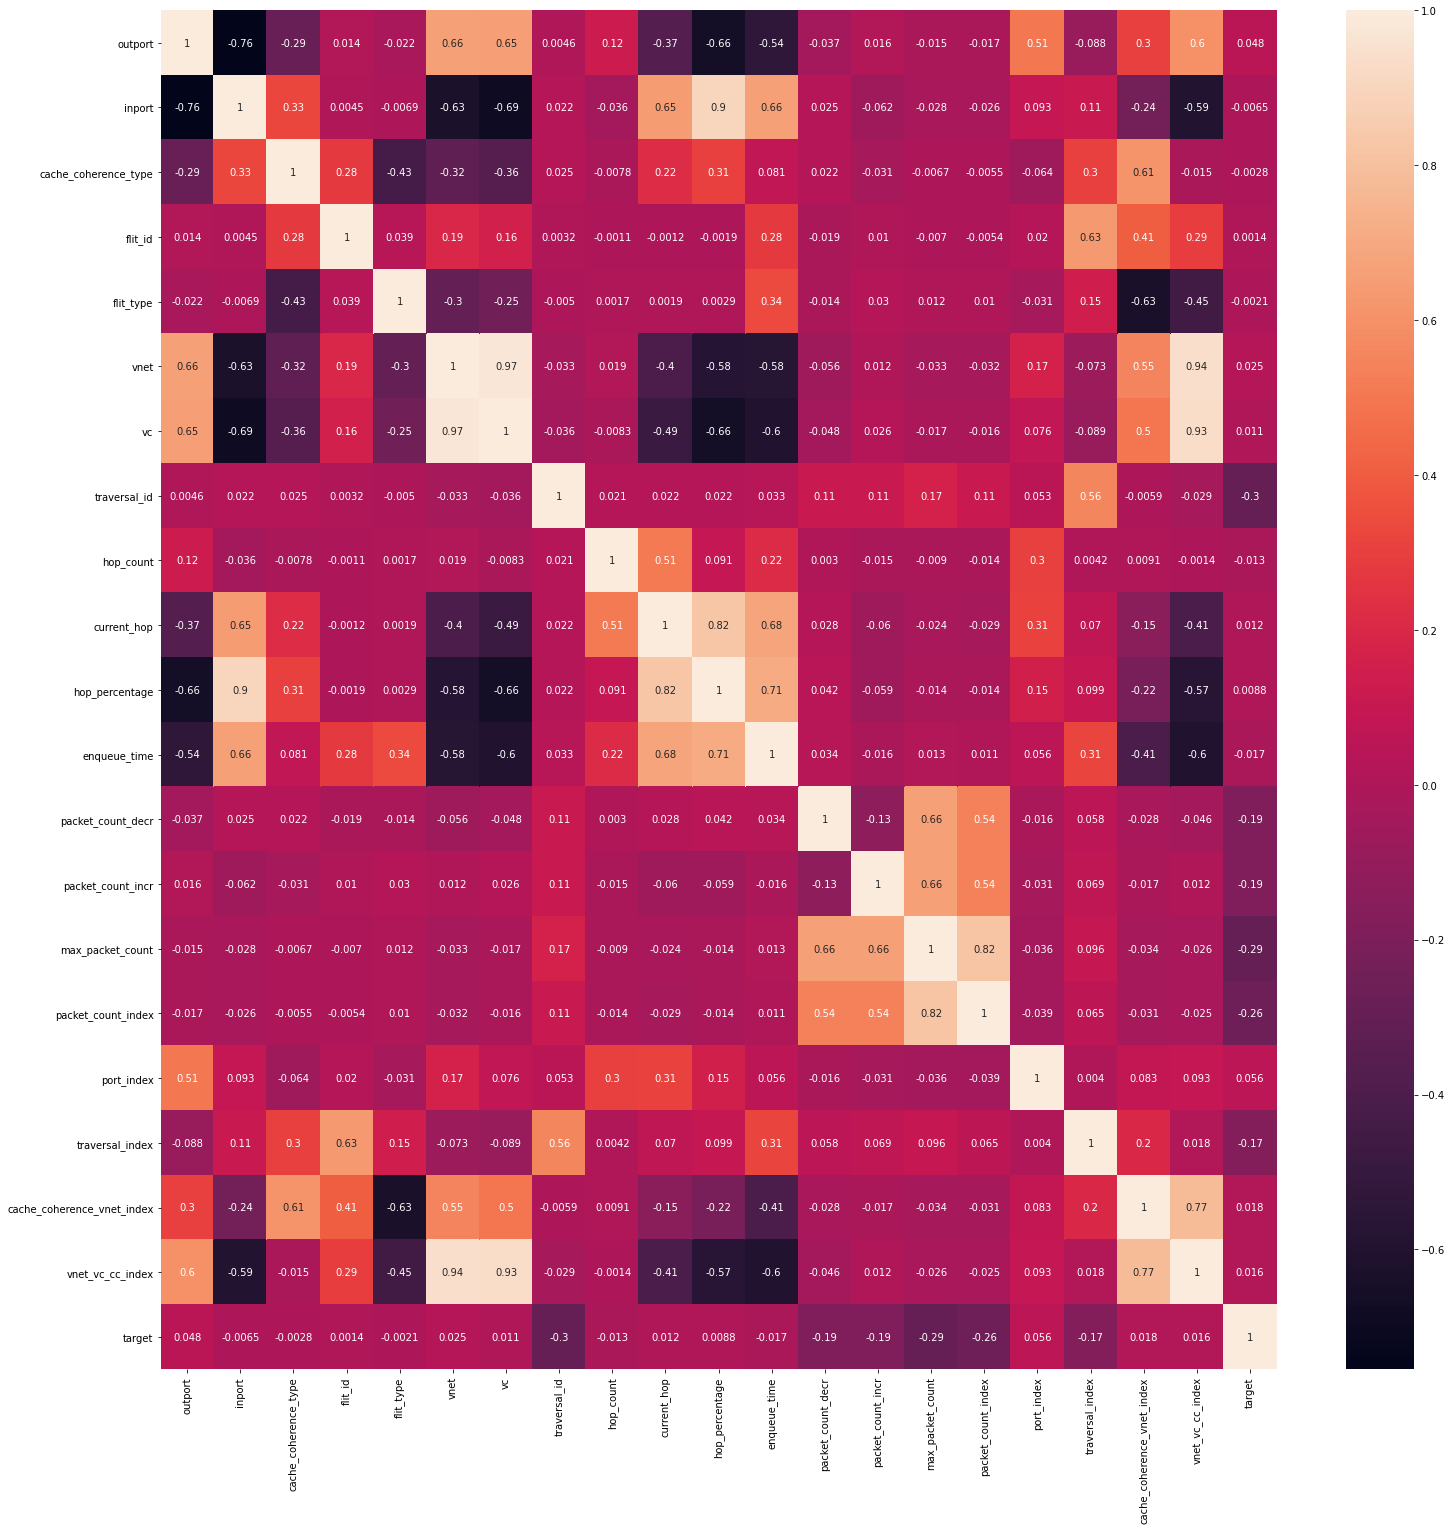

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['inport', 'vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

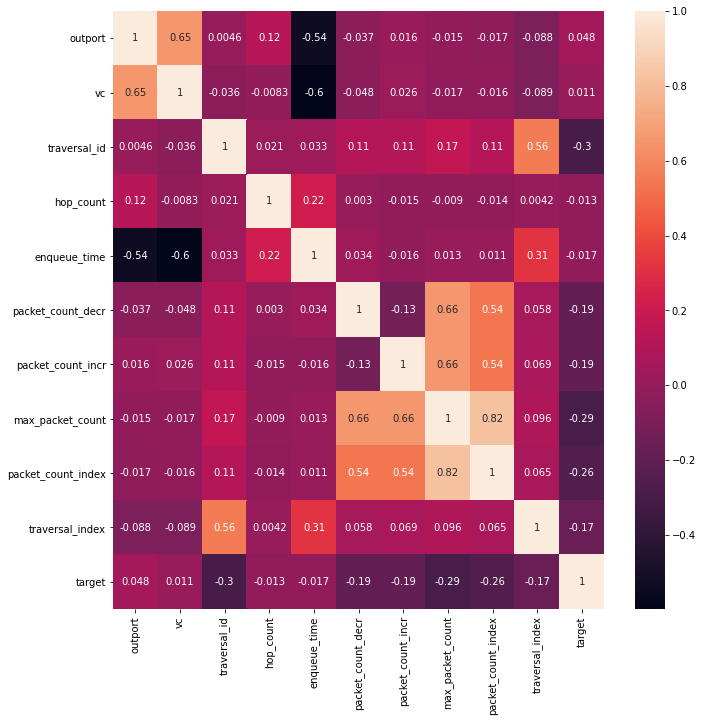

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

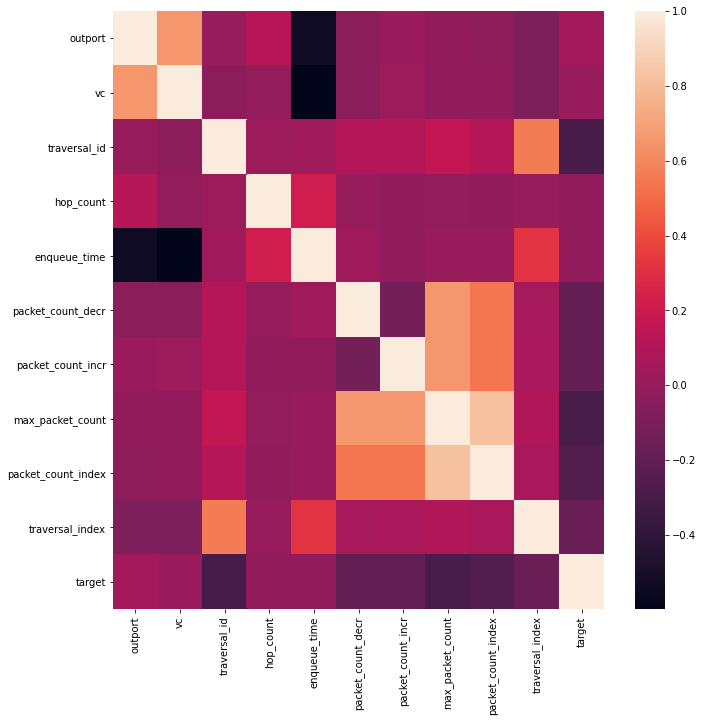

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.333333,0.000000,0.000066,0.4,0.111111,0.283951,0.000000,0.283951,0.003463,0.000003
1,0.333333,0.000000,0.000100,0.4,0.111111,0.358025,0.000000,0.358025,0.004366,0.000004
2,1.000000,0.727273,0.000000,0.6,0.166667,0.280864,0.003086,0.283951,0.006888,0.000000
3,1.000000,0.727273,0.000000,0.6,0.180556,0.277778,0.006173,0.283951,0.010238,0.000002
4,1.000000,0.727273,0.000000,0.6,0.194444,0.274691,0.009259,0.283951,0.013512,0.000004
...,...,...,...,...,...,...,...,...,...,...
312575,0.666667,0.909091,1.000000,0.8,0.013889,0.012346,0.058642,0.070988,0.003726,0.044444
312576,0.666667,0.909091,1.000000,0.8,0.027778,0.009259,0.061728,0.070988,0.003124,0.177780
312577,0.666667,0.909091,1.000000,0.8,0.041667,0.006173,0.064815,0.070988,0.002447,0.266671
312578,0.666667,0.909091,1.000000,0.8,0.055556,0.003086,0.067901,0.070988,0.001694,0.355561


In [20]:
train_X[train_X.duplicated()].shape

(5, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.333333,0.000000,0.000100,0.4,0.102564,0.500000,0.000000,0.500000,0.006849,0.000004
1,0.333333,0.000000,0.000133,0.4,0.102564,0.496528,0.003472,0.500000,0.013651,0.000006
2,1.000000,0.727273,0.000000,0.6,0.153846,0.493056,0.006944,0.500000,0.020358,0.000000
3,1.000000,0.727273,0.000000,0.6,0.166667,0.489583,0.010417,0.500000,0.026969,0.000002
4,1.000000,0.727273,0.000000,0.6,0.179487,0.486111,0.013889,0.500000,0.033486,0.000004
...,...,...,...,...,...,...,...,...,...,...
191573,0.666667,0.909091,1.000000,0.8,0.012821,0.013889,0.065972,0.079861,0.004709,0.044444
191574,0.666667,0.909091,1.000000,0.8,0.025641,0.010417,0.069444,0.079861,0.003948,0.177780
191575,0.666667,0.909091,1.000000,0.8,0.038462,0.006944,0.072917,0.079861,0.003092,0.266671
191576,0.666667,0.909091,1.000000,0.8,0.051282,0.003472,0.076389,0.079861,0.002140,0.355561


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    183093
1    129487
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  3047.165558
8  packet_count_index  2026.600494
7    max_packet_count  2005.287150
6   packet_count_incr  1016.351887
9     traversal_index  1001.031966
5   packet_count_decr   989.019412
0             outport   154.584679
4        enqueue_time     8.506966
1                  vc     8.096821
3           hop_count     7.099704


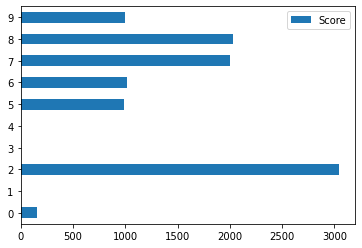

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.0422866092404
Test Prediction Score 97.3960756941213


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 84.39277996429652
Test Prediction Score 84.91680545811889
Test Prediction Score 83.4424883123447
Test Prediction Score 82.62184728437617
Test Prediction Score 82.39015835406957


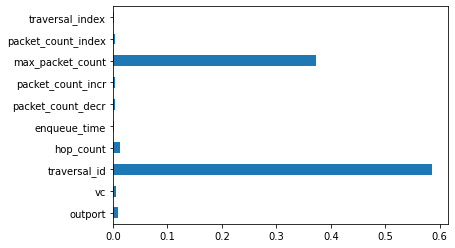

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

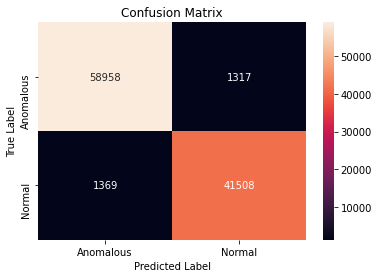

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     60275
           1       0.97      0.97      0.97     42877

    accuracy                           0.97    103152
   macro avg       0.97      0.97      0.97    103152
weighted avg       0.97      0.97      0.97    103152



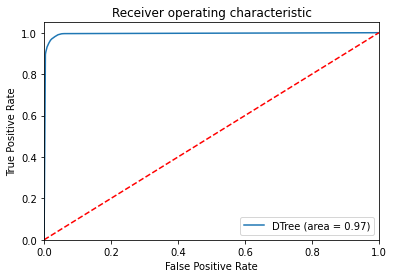

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r4l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99952250892909
Test Prediction Score 99.88851403753684


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.82289198133397
Test Prediction Score 86.03981127932695
Test Prediction Score 84.51754201238259
Test Prediction Score 82.99955086823122
Test Prediction Score 83.07872178622976


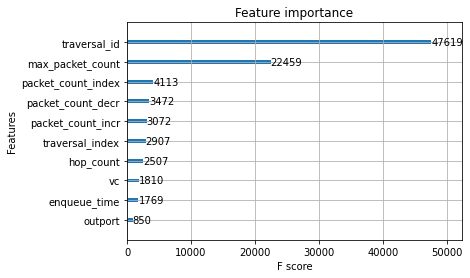

In [47]:
plot_importance(xgbc)
plt.show()

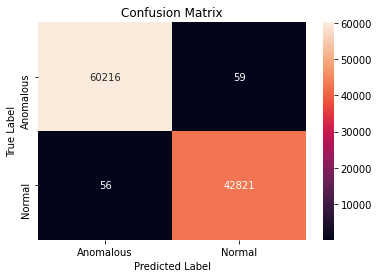

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60275
           1       1.00      1.00      1.00     42877

    accuracy                           1.00    103152
   macro avg       1.00      1.00      1.00    103152
weighted avg       1.00      1.00      1.00    103152



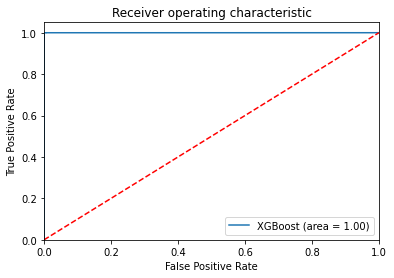

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()